# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives


Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.



## The Data Science Pipeline

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [39]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [40]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  

properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None, parse_dates=True)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [41]:
# Look at the original dataframe. 
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [42]:
# Transpose the dataframe so that the observations are in the columns, not the rows, and reset the 
# index. Assign the new dataframe to properties_T. 

properties_T = properties.transpose().reset_index()
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,305,306,307,308,309,310,311,312,313,314
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,918209.3301,882872.1038,786626.6665,827658.5167,798499.1646,836807.0518,782056.9146,803125.7173,771641.0937,675308.9135
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,293815.8517,300526.2859,304555.5886,304923.5027,301702.4656,304852.1338,305055.9899,310568.6465,316477.4075,323953.8997
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,526032.9436,518175.0457,523279.8903,529660.1524,533619.23,530353.5205,531932.234,532704.7255,540601.3953,531887.2393
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,339353.0015,340893.0807,344091.2308,346679.9244,345061.4945,345404.9836,348681.3564,354052.3348,358905.6134,363411.5969


In [43]:
# Because the dates on which observations are recorded comprise the first row of the dataframe, 
# make the column labels equal to the first row of the dataframe. 

properties_T.columns = properties_T.iloc[0]
properties_T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,918209.3301,882872.1038,786626.6665,827658.5167,798499.1646,836807.0518,782056.9146,803125.7173,771641.0937,675308.9135
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,293815.8517,300526.2859,304555.5886,304923.5027,301702.4656,304852.1338,305055.9899,310568.6465,316477.4075,323953.8997
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,526032.9436,518175.0457,523279.8903,529660.1524,533619.23,530353.5205,531932.234,532704.7255,540601.3953,531887.2393
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,339353.0015,340893.0807,344091.2308,346679.9244,345061.4945,345404.9836,348681.3564,354052.3348,358905.6134,363411.5969


In [44]:
# Then, delete the superfluous row. 

properties_T = properties_T.drop(index=0) 
properties_T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,918209.3301,882872.1038,786626.6665,827658.5167,798499.1646,836807.0518,782056.9146,803125.7173,771641.0937,675308.9135
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,293815.8517,300526.2859,304555.5886,304923.5027,301702.4656,304852.1338,305055.9899,310568.6465,316477.4075,323953.8997
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,526032.9436,518175.0457,523279.8903,529660.1524,533619.23,530353.5205,531932.234,532704.7255,540601.3953,531887.2393
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,339353.0015,340893.0807,344091.2308,346679.9244,345061.4945,345404.9836,348681.3564,354052.3348,358905.6134,363411.5969
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,482808.0821,484159.9118,482303.0931,497729.0327,519561.8277,522239.3216,513891.893,497018.3756,514178.5004,502263.8112


**2.3. Cleaning the data (part 2)**

You might **rename** a couple columns. How do you do this? The clue's pretty bold...

In [45]:
# Rename the first column and second columns. 

properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,918209.3301,882872.1038,786626.6665,827658.5167,798499.1646,836807.0518,782056.9146,803125.7173,771641.0937,675308.9135
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,293815.8517,300526.2859,304555.5886,304923.5027,301702.4656,304852.1338,305055.9899,310568.6465,316477.4075,323953.8997
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,526032.9436,518175.0457,523279.8903,529660.1524,533619.23,530353.5205,531932.234,532704.7255,540601.3953,531887.2393
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,339353.0015,340893.0807,344091.2308,346679.9244,345061.4945,345404.9836,348681.3564,354052.3348,358905.6134,363411.5969
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,482808.0821,484159.9118,482303.0931,497729.0327,519561.8277,522239.3216,513891.893,497018.3756,514178.5004,502263.8112


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [46]:
# Because the dataframe consists of unique index-column pairs to identify values, 
# we can use melt. Specify the 'London_Borough' and 'ID' columns as the column IDs. 

clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [47]:
# Rename the date and value columns. 

clean_properties = clean_properties.rename(columns = {0: 'Date', 'value': 'Average_price'})
clean_properties.head()

,London_Borough,ID,Date,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [48]:
# Observe that the prices are currently strings. 

clean_properties.dtypes

London_Borough            object
ID                        object
Date              datetime64[ns]
Average_price             object
dtype: object

In [49]:
# Change the data type of the 'Average_price' column to floats and check the datatypes again. 

clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])
clean_properties.dtypes

London_Borough            object
ID                        object
Date              datetime64[ns]
Average_price            float64
dtype: object

In [50]:
# Look at the count of values in each column to see if they are equal
# If they do not match, there may be a problem with missing data or inappropriate values. 

clean_properties.count()

London_Borough    15072
ID                14130
Date              15072
Average_price     14130
dtype: int64

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [51]:
# Do we have more than 32 unique entries in the London Borough column?

unique1 = clean_properties['London_Borough'].unique()
np.count_nonzero(unique1)

48

In [52]:
# Drop rows which contain any missing values, then count the unique entries again. 

NaNFreeDF = clean_properties.dropna()
unique2 = NaNFreeDF['London_Borough'].unique()
np.count_nonzero(unique2)

45

In [53]:
# There are entries in the London Boroughs column which are not actually boroughs. 
# List of London boroughs. (2021, April 15). In Wikipedia. https://en.wikipedia.org/wiki/List_of_London_boroughs

print(unique2)

['City of London' 'Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley'
 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith & Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington & Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster' 'Inner London' 'Outer London' 'NORTH EAST' 'NORTH WEST'
 'YORKS & THE HUMBER' 'EAST MIDLANDS' 'WEST MIDLANDS' 'EAST OF ENGLAND'
 'LONDON' 'SOUTH EAST' 'SOUTH WEST' 'England']


In [54]:
# The nonBoroughs which are included in the London boroughs column are put into a list, and
# the dataframe is filtered to exlude those boroughs. 
# Note, the wikipedia page notes that 'City of London' is not a London borough. 

nonBoroughs = ['Inner London', 'Outer London','NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST','England', 'City of London']
NaNFreeDF = NaNFreeDF[~NaNFreeDF.London_Borough.isin(nonBoroughs)]
NaNFreeDF.head()

,London_Borough,ID,Date,Average_price
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692


In [55]:
# Rename dataframe per convention. 

df = NaNFreeDF

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

Text(0, 0.5, 'Price')

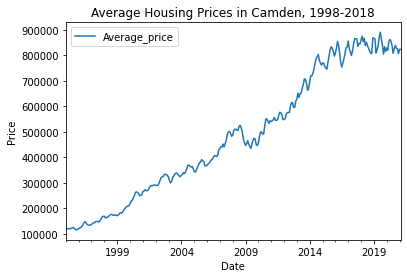

In [56]:
# First of all, make a variable called camden_prices, and assign it the result of filtering df on the following condition:
# df['London_Borough'] == 'Camden'
camden_prices = df[df['London_Borough'] == 'Camden']

# Make a variable called ax. Assign it the result of calling the plot() method, and plugging in the following values as parameters:
# kind ='line', x = 'Month', y='Average_price'
ax = camden_prices.plot(kind ='line', x = 'Date', y='Average_price', title='Average Housing Prices in Camden, 1998-2018')

# Finally, call the set_ylabel() method on ax, and set that label to the string: 'Price'. 
ax.set_ylabel('Price')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [57]:
# Use a lambda function to add a new column, 'Year', to the dataframe, extracted from the Date column. 

df['Year'] = df['Date'].apply(lambda t: t.year)
df.sample()


,London_Borough,ID,Date,Average_price,Year
9041,Hounslow,E09000018,2010-09-01,271362.0029,2010


In [58]:
# Using the function 'groupby' will help calculate the mean for each year and for each Borough. 
## As you can see, the variables Borough and Year are now multi-level indices, so reset the indexes. 

dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [59]:
# The assignment suggests using a price ratio, as below. 

def create_price_ratio(borough_df):
    Average_2018 = float(borough_df['Average_price'][borough_df['Year'] == 2018])
    Average_1998 = float(borough_df['Average_price'][borough_df['Year'] == 1998])
    Price_ratio = [Average_1998 / Average_2018]
    return Price_ratio

# Sample implementation of function create_price_ratio
create_price_ratio(dfg[dfg['London_Borough']=='Barking & Dagenham'])


[0.20422256235393685]

In [60]:
# initialize empty dictionary
ratios = {}

# loop over boroughs, populating the ratios dictionary as you go. 

for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    ratios[b] = create_price_ratio(borough)
    
print(ratios)



{'Barking & Dagenham': [0.20422256235393685], 'Barnet': [0.22945274120785797], 'Bexley': [0.2353507654063011], 'Brent': [0.2043086864360114], 'Bromley': [0.24421308489837312], 'Camden': [0.20261973503252542], 'Croydon': [0.23803288028014047], 'Ealing': [0.23194048191708755], 'Enfield': [0.23455064269011863], 'Greenwich': [0.20995010893854218], 'Hackney': [0.16133493530705734], 'Hammersmith & Fulham': [0.24167443054605853], 'Haringey': [0.19475619095546956], 'Harrow': [0.24635417785626296], 'Havering': [0.23120155787014757], 'Hillingdon': [0.23807975835429931], 'Hounslow': [0.25148317824115635], 'Islington': [0.20643891170300285], 'Kensington & Chelsea': [0.19675491852791563], 'Kingston upon Thames': [0.23416190234282552], 'Lambeth': [0.20170435486140822], 'Lewisham': [0.1835124676472171], 'Merton': [0.21091380604361798], 'Newham': [0.18848754146121072], 'Redbridge': [0.2236545053715767], 'Richmond upon Thames': [0.24967779731157863], 'Southwark': [0.18127484171283462], 'Sutton': [0.242

In [61]:
# Make a dataframe from the dictionary. 
ratio_df = pd.DataFrame(ratios)
ratio_df.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.204223,0.229453,0.235351,0.204309,0.244213,0.20262,0.238033,0.23194,0.234551,0.20995,...,0.210914,0.188488,0.223655,0.249678,0.181275,0.242806,0.216137,0.171387,0.210185,0.186791


In [62]:
# Again, the observations should be in a column, not in a row. Use transpose.

ratio_df_T = ratio_df.transpose().reset_index()
ratio_df_T.head()

,index,0
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [63]:
# Rename the columns to useful names. 

ratio_df_T.rename(columns={'index':'Borough', 0:'Price_ratio'}, inplace=True)
ratio_df_T.head()

,Borough,Price_ratio
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [64]:
# To make the visualization simpler, choose the top 15 ratios. Because the exercise suggests that
# the price_ratio = Avg1998/Avg2018, the most price increase is demonstrated by the lowest ratio.

top15ratio = ratio_df_T.sort_values(by='Price_ratio',ascending=True).head(15)
print(top15ratio)

                 Borough  Price_ratio
10               Hackney     0.161335
29        Waltham Forest     0.171387
26             Southwark     0.181275
21              Lewisham     0.183512
31           Westminster     0.186791
23                Newham     0.188488
12              Haringey     0.194756
18  Kensington & Chelsea     0.196755
20               Lambeth     0.201704
5                 Camden     0.202620
0     Barking & Dagenham     0.204223
3                  Brent     0.204309
17             Islington     0.206439
9              Greenwich     0.209950
30            Wandsworth     0.210185


In [65]:
# Create a filter for the top 15 ratios
filter_top15ratio = top15ratio[['Borough', 'Price_ratio']]

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'Haringey'),
 Text(7, 0, 'Kensington & Chelsea'),
 Text(8, 0, 'Lambeth'),
 Text(9, 0, 'Camden'),
 Text(10, 0, 'Barking & Dagenham'),
 Text(11, 0, 'Brent'),
 Text(12, 0, 'Islington'),
 Text(13, 0, 'Greenwich'),
 Text(14, 0, 'Wandsworth')]

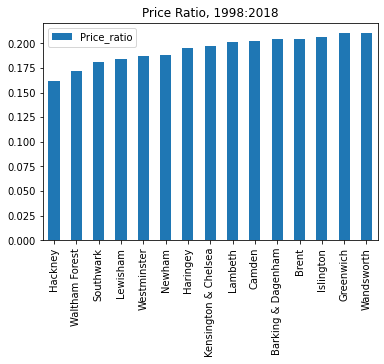

In [66]:
# Plot the Price Ratios indicating the biggest price increase. 

ax = top15ratio.plot(kind='bar', title="Price Ratio, 1998:2018")
ax.set_xticklabels(top15ratio.Borough)

In [67]:
# Because percentages are easier for me to visualize, here is a percentage increase function, as well.
# The conclusions should be identical to the price ratio procedure. 

def create_percentage_increase(borough_df):
    Average_2018 = float(borough_df['Average_price'][borough_df['Year'] == 2018])
    Average_1998 = float(borough_df['Average_price'][borough_df['Year'] == 1998])
    Percentage_change = [((Average_2018 - Average_1998) / Average_1998) * 100]
    return Percentage_change

# Sample implementation
create_percentage_increase(dfg[dfg['London_Borough']=='Barking & Dagenham']) 

[389.66186129175395]

In [68]:
# Repeat for the percentage increase. Create empty dictionary. 

percentages = {}

# loop over boroughs, populating percentages dictionary with returned value from function. 
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    percentages[b] = create_percentage_increase(borough)
    
print(percentages)

{'Barking & Dagenham': [389.66186129175395], 'Barnet': [335.8195917538044], 'Bexley': [324.8977046127876], 'Brent': [389.4554497139287], 'Bromley': [309.4784685333876], 'Camden': [393.53534088842605], 'Croydon': [320.1100280024768], 'Ealing': [331.14509021218345], 'Enfield': [326.3471583495809], 'Greenwich': [376.30363473291925], 'Hackney': [519.8285561008662], 'Hammersmith & Fulham': [313.77981019362295], 'Haringey': [413.4624964136042], 'Harrow': [305.9196432964319], 'Havering': [332.52303713353075], 'Hillingdon': [320.0273080384457], 'Hounslow': [297.64091061433294], 'Islington': [384.40480128022983], 'Kensington & Chelsea': [408.2465066092464], 'Kingston upon Thames': [327.05495214842705], 'Lambeth': [395.77511635140627], 'Lewisham': [444.9221041059684], 'Merton': [374.1273313294604], 'Newham': [430.5390437201879], 'Redbridge': [347.1182006097364], 'Richmond upon Thames': [300.5161895721457], 'Southwark': [451.6485302379376], 'Sutton': [311.8522608573157], 'Tower Hamlets': [362.670

In [69]:
# Transpose the new dataframe consisting of burough names and percentage increase values
# Rename the columns to appropriate names. 

percentage_df_T = pd.DataFrame(percentages).transpose().reset_index()
percentage_df_T.rename(columns={'index':'Borough', 0:'Percentage_increase'}, inplace=True)
percentage_df_T.head()

,Borough,Percentage_increase
0,Barking & Dagenham,389.661861
1,Barnet,335.819592
2,Bexley,324.897705
3,Brent,389.455450
4,Bromley,309.478469


In [70]:
# Take the top 15 percentage increases. 

top15percentage = percentage_df_T.sort_values(by='Percentage_increase',ascending=False).head(15)
print(top15percentage)

                 Borough  Percentage_increase
10               Hackney           519.828556
29        Waltham Forest           483.475581
26             Southwark           451.648530
21              Lewisham           444.922104
31           Westminster           435.356539
23                Newham           430.539044
12              Haringey           413.462496
18  Kensington & Chelsea           408.246507
20               Lambeth           395.775116
5                 Camden           393.535341
0     Barking & Dagenham           389.661861
3                  Brent           389.455450
17             Islington           384.404801
9              Greenwich           376.303635
30            Wandsworth           375.770935


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'Haringey'),
 Text(7, 0, 'Kensington & Chelsea'),
 Text(8, 0, 'Lambeth'),
 Text(9, 0, 'Camden'),
 Text(10, 0, 'Barking & Dagenham'),
 Text(11, 0, 'Brent'),
 Text(12, 0, 'Islington'),
 Text(13, 0, 'Greenwich'),
 Text(14, 0, 'Wandsworth')]

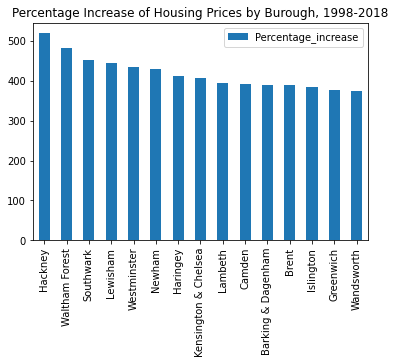

In [71]:
# Use filter out a dataframe containing the values for the top 15 percentage increases, and plot.

filter_top15percentage = top15percentage[['Borough', 'Percentage_increase']]
ax = filter_top15percentage.plot(kind='bar', title="Percentage Increase of Housing Prices by Burough, 1998-2018")
ax.set_xticklabels(top15percentage.Borough)

In [72]:
# Merge the results from using percentage increase with the results from using the price ratio
# The results give the same conclusion. 

testdf = pd.merge(filter_top15percentage, filter_top15ratio, on='Borough')
print(testdf)

                 Borough  Percentage_increase  Price_ratio
0                Hackney           519.828556     0.161335
1         Waltham Forest           483.475581     0.171387
2              Southwark           451.648530     0.181275
3               Lewisham           444.922104     0.183512
4            Westminster           435.356539     0.186791
5                 Newham           430.539044     0.188488
6               Haringey           413.462496     0.194756
7   Kensington & Chelsea           408.246507     0.196755
8                Lambeth           395.775116     0.201704
9                 Camden           393.535341     0.202620
10    Barking & Dagenham           389.661861     0.204223
11                 Brent           389.455450     0.204309
12             Islington           384.404801     0.206439
13             Greenwich           376.303635     0.209950
14            Wandsworth           375.770935     0.210185


### 4. Conclusion

Of the boroughs in London, the borough of Hackney saw the greatest increase in price, on average, between 1998 and 2018.